# New Year's Eve Tweets 2020

I have just completed the course ' Analyzing Social Media Data in Python' on DataCamp and I wanted to put what learned into practice. I analysed tweets about New Year's Eve 2020.

In [1]:
# to import all necessary libraries
import tweepy
import json
import csv
from datetime import date
from datetime import datetime
import time

In [2]:
from tweepy.streaming import StreamListener
import time 
from tweepy import OAuthHandler
from tweepy import API
from tweepy import Cursor

In [3]:
auth = OAuthHandler('Oa7A01GauGvuy8RM4KoA4ybse', 'ExJ7b8JEPR0SwSByowGWopAKWhi5OzqQkLQGJenS7J0LAaCBFU')
auth.set_access_token('1277615951333261314-ER8DifqHLc7Dokl8ew9EbVTAnXMUAQ', 'ZSD7dIJkLIlOCB9NiBjRFKOERVZP31ZPBSdJgVCLiE7iq')
tweet_list=[]
class MyStreamListener(tweepy.StreamListener):
    def __init__(self,api=None):
        super(MyStreamListener,self).__init__()
        self.num_tweets=0
        self.file=open("tweet.txt","w")
    def on_status(self,status):
        tweet=status._json
        self.file.write(json.dumps(tweet)+ '\n')
        tweet_list.append(status)
        self.num_tweets+=1
        if self.num_tweets<1000:
            return True
        else:
            return False
        self.file.close()

#create streaming object and authenticate
l = MyStreamListener()
stream =tweepy.Stream(auth,l)
#this line filters twiiter streams to capture data by keywords
stream.filter(track=['NewYearsEve','GoodBye2020','Happy 2021'])

In [4]:
api = API(auth, wait_on_rate_limit=True)

In [5]:
#api.update_status("Look, I'm tweeting from #Python in my #earthanalytics class! @EarthLabCU")
search_words = "#NewYearsEve"
date_since = "2020-12-30"

In [6]:
tweets = Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(5000)
tweets

In [7]:
my_list=[]
user_list=[]
loc_list=[]

In [8]:
for tweet in tweets:
    my_list.append(tweet.text)
    user_list.append(tweet.user.screen_name)
    loc_list.append(tweet.user.location)

In [ ]:
#users_list=[tweet.user.screen_name for tweet in tweets]

In [127]:
from pandas import DataFrame

In [128]:
df=DataFrame(my_list,columns=['text'])

In [129]:
df.head(5)

,text
0,RT @CanalRiverTrust: Happy #NewYearsEve everyo...
1,RT @samaritans: Saying goodbye to the year can...
2,liquor stores are so full! #NewYearsEve
3,RT @tumi_monakhisi: 30% OFF DECEMBER SPECIAL‼️...
4,InshAllah 2021 only brings happiness and remov...


In [130]:
df['user_id']= user_list

In [131]:
df.head(5)

,text,user_id
0,RT @CanalRiverTrust: Happy #NewYearsEve everyo...,David96212152
1,RT @samaritans: Saying goodbye to the year can...,Aishamindmatte1
2,liquor stores are so full! #NewYearsEve,kealey___
3,RT @tumi_monakhisi: 30% OFF DECEMBER SPECIAL‼️...,Sirmayorlive
4,InshAllah 2021 only brings happiness and remov...,Ayat_hn


In [132]:
df['location']=loc_list

In [133]:
df.head(5)

,text,user_id,location
0,RT @CanalRiverTrust: Happy #NewYearsEve everyo...,David96212152,"West Midlands, England"
1,RT @samaritans: Saying goodbye to the year can...,Aishamindmatte1,"Purfleet, Thurrock, Essex"
2,liquor stores are so full! #NewYearsEve,kealey___,Pta | Jhb
3,RT @tumi_monakhisi: 30% OFF DECEMBER SPECIAL‼️...,Sirmayorlive,Abuja
4,InshAllah 2021 only brings happiness and remov...,Ayat_hn,


In [134]:
df.describe()

,text,user_id,location
count,5000,5000,5000
unique,3227,4410,2139
top,"RT @ZeeNewsEnglish: Sidharth Shukla, Shehnaaz ...",Alima1000,
freq,49,26,1131


In [135]:
df.user_id.nunique()

4410

In [136]:
df.location.nunique()

2139



to Summarize and count words found in tweets.

In [137]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [138]:
#to Remove URLs from tweets.
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [139]:
df.text=df.text.apply(remove_url)

In [140]:
df.head(5)

,text,user_id,location
0,RT CanalRiverTrust Happy NewYearsEve everyone ...,David96212152,"West Midlands, England"
1,RT samaritans Saying goodbye to the year can b...,Aishamindmatte1,"Purfleet, Thurrock, Essex"
2,liquor stores are so full NewYearsEve,kealey___,Pta | Jhb
3,RT tumimonakhisi 30 OFF DECEMBER SPECIALBUILD ...,Sirmayorlive,Abuja
4,InshAllah 2021 only brings happiness and remov...,Ayat_hn,


In [141]:
#to Clean up tweet text, including differences in case that will affect unique word counts
df.text=df.text.str.lower()

In [142]:
df.text.str.split()

0       [rt, canalrivertrust, happy, newyearseve, ever...
1       [rt, samaritans, saying, goodbye, to, the, yea...
2            [liquor, stores, are, so, full, newyearseve]
3       [rt, tumimonakhisi, 30, off, december, special...
4       [inshallah, 2021, only, brings, happiness, and...
                              ...                        
4995    [rt, adoptionsuk, please, retweet, to, help, b...
4996    [yo, things, would, be, a, lot, more, easier, ...
4997    [rt, juniexd, newyearseve, have, a, safe, and,...
4998    [a, cold, and, frosty, start, to, newyearseve,...
4999    [rt, brownielb1, just, me, and, the, sound, of...
Name: text, Length: 5000, dtype: object

In [143]:
words_in_tweet = [tweet.lower().split() for tweet in df.text]

In [144]:
words_in_tweet[:2]

[['rt',
  'canalrivertrust',
  'happy',
  'newyearseve',
  'everyone',
  'stay',
  'safe',
  'and',
  'be',
  'extra',
  'careful',
  'if',
  'youre',
  'spending',
  'time',
  'by',
  'water',
  'this',
  'festive',
  'season',
  're'],
 ['rt',
  'samaritans',
  'saying',
  'goodbye',
  'to',
  'the',
  'year',
  'can',
  'bring',
  'up',
  'lots',
  'of',
  'mixed',
  'emotions',
  'especially',
  'when',
  'its',
  'been',
  'a',
  'difficult',
  'year',
  'for',
  'many',
  'of',
  'us']]

In [152]:
all_words_no_urls = list(itertools.chain(*words_in_tweet))

In [159]:
counts_no_urls = collections.Counter(all_words_no_urls)

In [163]:
counts_no_urls.most_common(15)

[('', 13971),
 ('newyearseve', 2165),
 ('new', 1328),
 ('year', 1250),
 ('in', 1013),
 ('you', 995),
 ('this', 880),
 ('is', 870),
 ('with', 784),
 ('2020', 710),
 ('i', 701),
 ('we', 689),
 ('on', 652),
 ('all', 616),
 ('happy', 609)]

In [148]:
type(all_words_no_urls)

list

In [158]:
for n, i in enumerate(all_words_no_urls):
    if i == 'rt'or i == 'the' or i == 'to' or i == 'a' or i == 'of' or i == 'and' or i == 'for' or i == ' in ' or i == ' you ' or i == ' this ' or i == ' is ' or i == ' with ':
        all_words_no_urls[n] =''

In [164]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

In [165]:
clean_tweets_no_urls


,words,count
0,,13971
1,newyearseve,2165
2,new,1328
3,year,1250
4,in,1013
5,you,995
6,this,880
7,is,870
8,with,784
9,2020,710


In [170]:
clean_tweets_no_urls=clean_tweets_no_urls.drop([0, 1])

In [171]:
clean_tweets_no_urls.reset_index()

,index,words,count
0,2,new,1328
1,3,year,1250
2,4,in,1013
3,5,you,995
4,6,this,880
5,7,is,870
6,8,with,784
7,9,2020,710
8,10,i,701
9,11,we,689


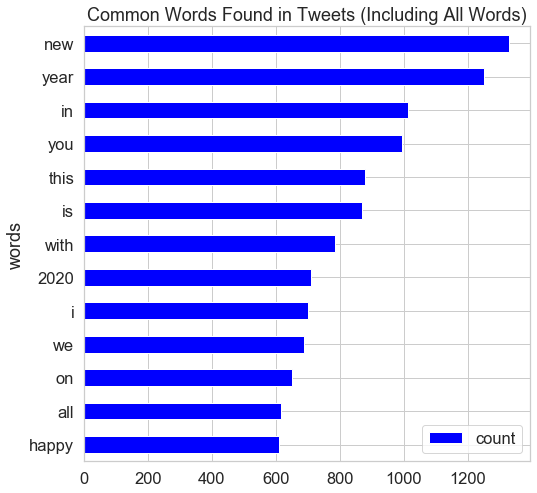

In [179]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="blue")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

In [180]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cihat\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [181]:
stop_words = set(stopwords.words('english'))

In [182]:
list(stop_words)[0:10]

['ours', 'weren', 'such', 'own', 'itself', 'my', 'again', 'so', 'few', 'its']

In [183]:
words_in_tweet[0]

['rt',
 'canalrivertrust',
 'happy',
 'newyearseve',
 'everyone',
 'stay',
 'safe',
 'and',
 'be',
 'extra',
 'careful',
 'if',
 'youre',
 'spending',
 'time',
 'by',
 'water',
 'this',
 'festive',
 'season',
 're']

In [185]:
tweets_nsw = [[word for word in tweet_words if not word in stop_words] for tweet_words in words_in_tweet]

In [186]:
tweets_nsw[0]

['rt',
 'canalrivertrust',
 'happy',
 'newyearseve',
 'everyone',
 'stay',
 'safe',
 'extra',
 'careful',
 'youre',
 'spending',
 'time',
 'water',
 'festive',
 'season']

In [187]:
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

[('rt', 2782),
 ('newyearseve', 2165),
 ('new', 1328),
 ('year', 1250),
 ('2020', 710),
 ('happy', 609),
 ('years', 519),
 ('2021', 456),
 ('day', 371),
 ('us', 369),
 ('eve', 368),
 ('newyear', 339),
 ('today', 308),
 ('amp', 302),
 ('home', 284)]

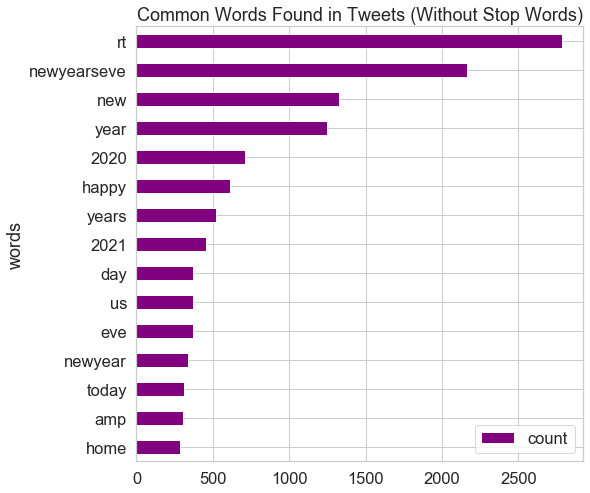

In [188]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

In [189]:
len(counts_nsw)

9436

In [190]:
clean_tweets_ncw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])
clean_tweets_ncw.head()

,words,count
0,rt,2782
1,newyearseve,2165
2,new,1328
3,year,1250
4,2020,710


In [191]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk import bigrams
from nltk.corpus import stopwords
import re
import networkx as nx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [192]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw]

# View bigrams for the first tweet
terms_bigram[0]

[('rt', 'canalrivertrust'),
 ('canalrivertrust', 'happy'),
 ('happy', 'newyearseve'),
 ('newyearseve', 'everyone'),
 ('everyone', 'stay'),
 ('stay', 'safe'),
 ('safe', 'extra'),
 ('extra', 'careful'),
 ('careful', 'youre'),
 ('youre', 'spending'),
 ('spending', 'time'),
 ('time', 'water'),
 ('water', 'festive'),
 ('festive', 'season')]

In [194]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('new', 'year'), 572),
 (('new', 'years'), 466),
 (('years', 'eve'), 358),
 (('happy', 'new'), 327),
 (('last', 'day'), 149),
 (('newyearseve', 'newyear'), 124),
 (('rt', 'adoptionsuk'), 119),
 (('please', 'retweet'), 119),
 (('retweet', 'help'), 119),
 (('find', 'home'), 119),
 (('adoptionsuk', 'please'), 116),
 (('happy', 'newyearseve'), 111),
 (('rt', 'tumimonakhisi'), 79),
 (('2020', 'newyearseve'), 77),
 (('rt', 'zeemangroup'), 77),
 (('happynewyear2021', 'newyearseve'), 75),
 (('day', '2020'), 70),
 (('aged', '2'), 69),
 (('newyearseve', 'newyear2021'), 66),
 (('newyearseve', 'goodbye2020'), 65)]

In [195]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(new, year)",572
1,"(new, years)",466
2,"(years, eve)",358
3,"(happy, new)",327
4,"(last, day)",149
5,"(newyearseve, newyear)",124
6,"(rt, adoptionsuk)",119
7,"(please, retweet)",119
8,"(retweet, help)",119
9,"(find, home)",119


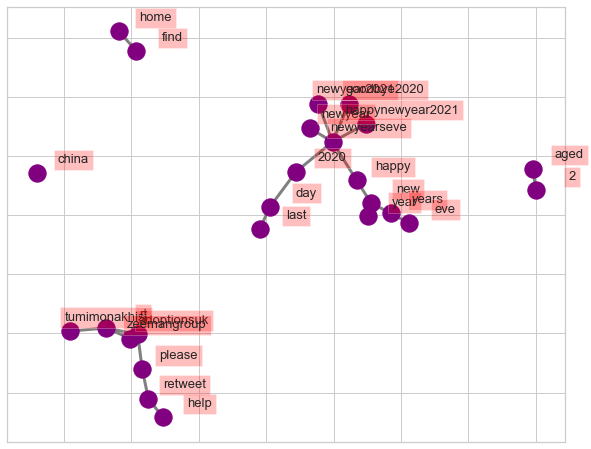

In [196]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

G.add_node("china", weight=100)
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

# Sentiment Analysis

In [198]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [206]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in all_words_no_urls]

sentiment_objects[0].polarity, sentiment_objects[0]

(0.0, TextBlob(""))

In [207]:
# Create list of polarity valuesx and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]

[0.0, '']

In [208]:
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])
sentiment_df.head()

,polarity,tweet
0,0.0,
1,0.0,canalrivertrust
2,0.8,happy
3,0.0,newyearseve
4,0.0,everyone


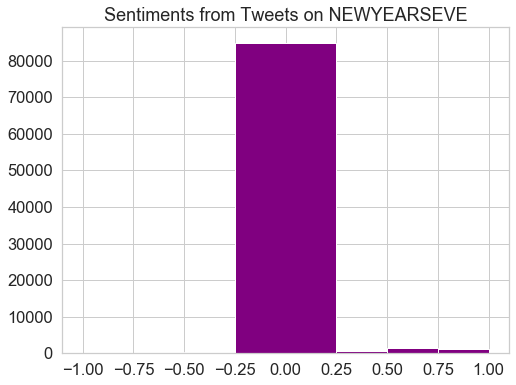

In [210]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on NEWYEARSEVE")
plt.show()

In [211]:
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]

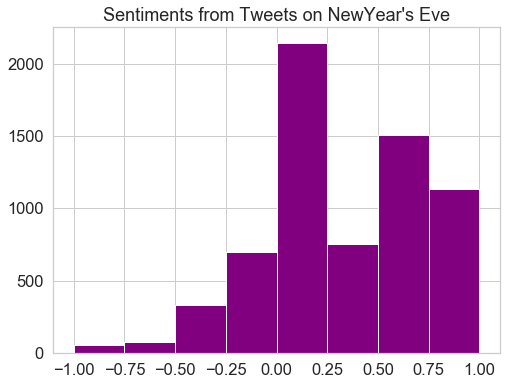

In [213]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on NewYear's Eve")
plt.show()

In [ ]:
# we see that almost all tweets is positive.